In [1]:
%matplotlib qt5
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
import matplotlib.image as mpimg
import matplotlib.patches as patches
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
matplotlib.rcParams.update({
        'xtick.labelsize'     : 20         ,
        'ytick.labelsize'     : 20         ,
        'font.size'           : 20         ,
        'figure.autolayout'   : True       ,
        'figure.figsize'      : [7.2,4.45] ,
        'axes.titlesize'      : 22        ,
        'axes.labelsize'      : 18         ,
        'lines.linewidth'     : 2          ,
        'lines.markersize'    : 5          ,
        'legend.fontsize'     : 20          }) 
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
def unosc(x,freq):
    N = len(x)
    new_x = []
    new_its = []
    for i in range(0,N,freq):
        if i+freq < N:
            w = np.average(x[i:i+freq],axis=0)
            new_x += [w.tolist()]
            
        else:
            w = np.average(x[-freq:],axis=0)
            new_x += [w.tolist()]
    new_x = np.asarray(new_x)
    
    return (new_x)


def simple_average(x,freq):
    N = len(x)
    new_x = np.zeros(N)
    for i in range(N):
        if i < freq:
            new_x[i] = np.average(x[0:i+freq+1])
        elif N-i <= freq:
            new_x[i] = np.average(x[i-freq:])
        else:
            new_x[i] = np.average(x[i-freq:i+freq+1])
            
    return new_x

def time_average_array(array,time):

    time = time[~np.isnan(array)[:,0]]
    array = array[~np.isnan(array)[:,0]]
    
    array_bar = np.zeros(len(array))

    for i in range(1,len(time)):
        array_bar[i] = array_bar[i-1] + .5*(array[i-1]+array[i])*(time[i]-time[i-1])
    array_bar[0] = array[0]
    for i in range(1,len(time)):
        array_bar[i] /= time[i]
    return (time,array_bar)
    
       
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return idx-1
    else:
        return idx
    

In [2]:
energy_nm_= []
t = []
i = 0


data = open('modal_energy', 'r')    #Reads data through a .txt file

for line in data:
    line = line[:-1]  #Removes newline
    line = line.split(" ")
    line[:] = [float(x) for x in line if x != '']
    if i == 0:
        parameters = line
        i+=1

    else:
        t += [line[0]]
        energy_nm_ += [line[1:]]
        
data.close()
t = np.array(t[:])
energy_nm_ = np.array(energy_nm_[:])
energy_prop = energy_nm_/sum(energy_nm_[0,:])
modes = len(energy_nm_[0])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(5):
    ax.plot(t,energy_nm_[:,i],label='Mode: '+str(i+1),linewidth = .4,color='k')
ax.set_xlabel(r'$\textbf{t}$')
#ax.set_xlim(left=0,right=600000)
#ax.set_ylim(bottom=0,top=.1)
if parameters[1] == 3:
    ax.set_ylabel(r'$\boldsymbol{E\alpha^{2}}$')
    print('N= '+str(parameters[0]))
    print('E*alpha^2= '+str(sum(energy_nm_[0,:])))
    #print('dt=' + str(parameters[4]))
if parameters[1] == 4:
    ax.set_ylabel(r'$\boldsymbol{E\beta}$')
    print('N= '+str(parameters[0]))
    print('E*beta= '+str(sum(energy_nm_[0,:])))
    #print('dt=' + str(parameters[4]))
energy_nm_[0]

/home/sal/Programs/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/sal/Programs/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


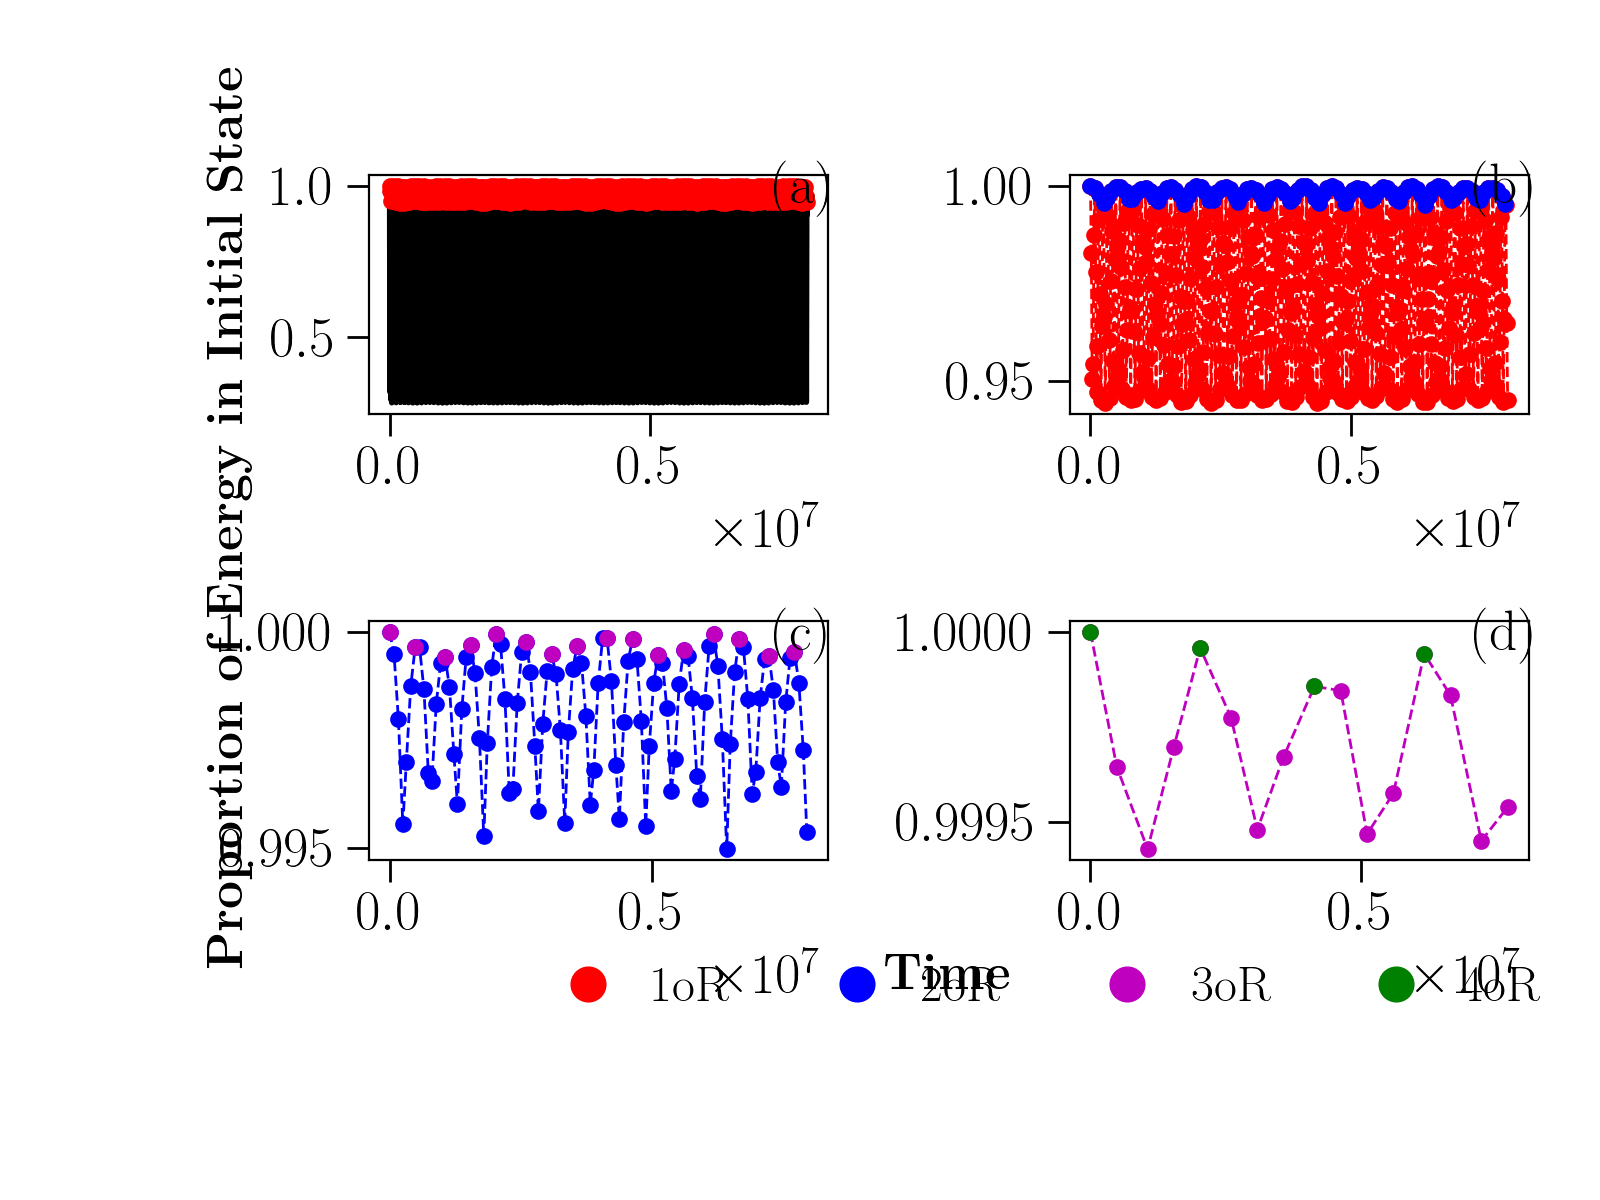

T_1oR: 16768.52198864843
T_2oR: 81106.47947726658
T_3oR: 514230.33264316624
T_4oR: 2056923.3317981476


In [6]:
r_order = 100
sr_order =3
ssr_order= 3
sssr_order= 3



#FPU_R
maxs = argrelextrema(energy_nm_[:,0], np.greater,order = r_order)[0]
r_envelope = np.insert(energy_prop[maxs,0],0,energy_prop[0,0])
r_time = np.insert(t[maxs],0,0)
t_r = np.zeros(len(r_time))
for i in range(1,len(t_r)):
    t_r[i] = r_time[i]-r_time[i-1]
ind_r = [x for x in range(len(t_r)) if t_r[x] != 0]
t_r=t_r[ind_r]
ind_r = [x for x in  range(len(t_r)) if t_r[x] > 0.8*np.average(t_r) and t_r[x] < 1.2*np.average(t_r)]
t_r = np.average(t_r[ind_r])
E_r = np.average(r_envelope[ind_r])


#SR
maxs = argrelextrema(r_envelope, np.greater,order=sr_order)[0]
sr_envelope = np.insert(r_envelope[maxs],0,r_envelope[0])
sr_time = np.insert(r_time[maxs],0,0)
t_sr = np.zeros(len(sr_time))
for i in range(1,len(t_sr)):
    if sr_time[i]-sr_time[i-1]>t_r:
        t_sr[i] = sr_time[i]-sr_time[i-1]
ind_sr = [x for x in range(len(t_sr)) if t_sr[x] != 0]
t_sr=t_sr[ind_sr]
ind_sr = [x for x in  range(len(t_sr)) if t_sr[x] > 0.8*np.average(t_sr) and t_sr[x] < 1.2*np.average(t_sr)]
t_sr = np.average(t_sr[ind_sr])
E_sr = np.average(sr_envelope[ind_sr])

#SSR
maxs = argrelextrema(sr_envelope, np.greater,order=ssr_order)[0]
ssr_envelope = np.insert(sr_envelope[maxs],0,sr_envelope[0])
ssr_time = np.insert(sr_time[maxs],0,0)
t_ssr = np.zeros(len(ssr_time))
for i in range(1,len(t_ssr)):
    if ssr_time[i]-ssr_time[i-1]>t_sr:
        t_ssr[i] = ssr_time[i]-ssr_time[i-1]
ind_ssr = [x for x in range(len(t_ssr)) if t_ssr[x] > 0.9*np.average(t_ssr[x]) and t_ssr[x] < 1.5*np.average(t_ssr[x])]
t_ssr = np.average(t_ssr[ind_ssr])
E_ssr = np.average(ssr_envelope[ind_ssr])

#SSSR
maxs = argrelextrema(ssr_envelope, np.greater,order=sssr_order)[0]
sssr_envelope = np.insert(ssr_envelope[maxs],0,ssr_envelope[0])
sssr_time = np.insert(ssr_time[maxs],0,0)
t_sssr = np.zeros(len(sssr_time))
for i in range(1,len(t_sssr)):
    if sssr_time[i]-sssr_time[i-1]>t_ssr:
        t_sssr[i] = sssr_time[i]-sssr_time[i-1]
ind_sssr = [x for x in range(len(t_sssr)) if t_sssr[x] > 0.9*np.average(t_sssr[x]) and t_sssr[x] < 1.5*np.average(t_sssr[x])]
t_sssr = np.average(t_sssr[ind_sssr])
E_sssr = np.average(sssr_envelope[ind_sssr])

#SSSSR
maxs = argrelextrema(sssr_envelope, np.greater,order=1)[0]
ssssr_envelope = np.insert(sssr_envelope[maxs],0,sssr_envelope[0])
ssssr_time = np.insert(sssr_time[maxs],0,0)
t_ssssr = np.zeros(len(ssssr_time))
for i in range(1,len(t_ssssr)):
    if ssssr_time[i]-ssssr_time[i-1]>t_ssr:
        t_ssssr[i] = ssssr_time[i]-ssssr_time[i-1]
ind_ssssr = [x for x in range(len(t_ssssr)) if t_ssssr[x] > 0.9*np.average(t_ssssr[x]) and t_ssssr[x] < 1.5*np.average(t_ssssr[x])]
t_ssssr = np.average(t_ssssr[ind_ssssr])
E_ssssr = np.average(ssssr_envelope[ind_ssssr])



fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax.set_ylabel(r'$\textbf{Proportion of Energy in Initial State}$')
ax.set_xlabel(r'$\textbf{Time}$')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_label_coords(-.1,0.5)
ax.xaxis.set_label_coords(.5,-.14)
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])



ax.plot([],[],'o', color='r',label='1oR')
ax.plot([],[],'o', color='b',label='2oR')
ax.plot([],[],'o', color='m',label='3oR')
ax.plot([],[],'o', color='g',label='4oR')


ax1.plot(t,energy_prop[:,0],color='k')
ax1.plot(r_time[:],r_envelope[:],'o', color='r')

#ax2.plot(t,energy_prop[:,0],color='k',linewidth=.5)
ax2.plot(r_time[:],r_envelope[:],'--o', color='r',linewidth=1)
ax2.plot(sr_time[:],sr_envelope[:],'o', color='b')

#ax3.plot(t,energy_prop[:,0],color='k',linewidth=.5)
#ax3.plot(r_time[:],r_envelope[:],'o', color='r',markersize=3)
ax3.plot(sr_time[:],sr_envelope[:],'--o', color='b',linewidth=1)
ax3.plot(ssr_time[:],ssr_envelope[:],'o', color='m')

#ax4.plot(t,energy_prop[:,0],color='k',linewidth=.5)
#ax4.plot(r_time[:],r_envelope[:],'o', color='r',markersize=3)
#ax4.plot(sr_time[:],sr_envelope[:],'o', color='b',markersize=3)
ax4.plot(ssr_time[:],ssr_envelope[:],'--o', color='m',linewidth=1)
ax4.plot(sssr_time[:],sssr_envelope[:],'o', color='g')


ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax3.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax4.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)


ax1.annotate("(a)", xy=(0.88, 0.88), xycoords="axes fraction")
ax2.annotate("(b)", xy=(0.88, 0.88), xycoords="axes fraction")
ax3.annotate("(c)", xy=(0.88, 0.88), xycoords="axes fraction")
ax4.annotate("(d)", xy=(0.88, 0.88), xycoords="axes fraction")


leg=ax.legend(loc=(0.15,-0.25),handlelength=1,framealpha=1,prop={'size':18},ncol=5,frameon=False)
for legobj in leg.legendHandles:
    legobj._legmarker.set_markersize(12.0)
    
fig.tight_layout()

print('T_1oR: ' + str(t_r))
print('T_2oR: ' + str(t_sr))
print('T_3oR: ' + str(t_ssr))
print('T_4oR: ' + str(t_sssr))


<IPython.core.display.Javascript object>


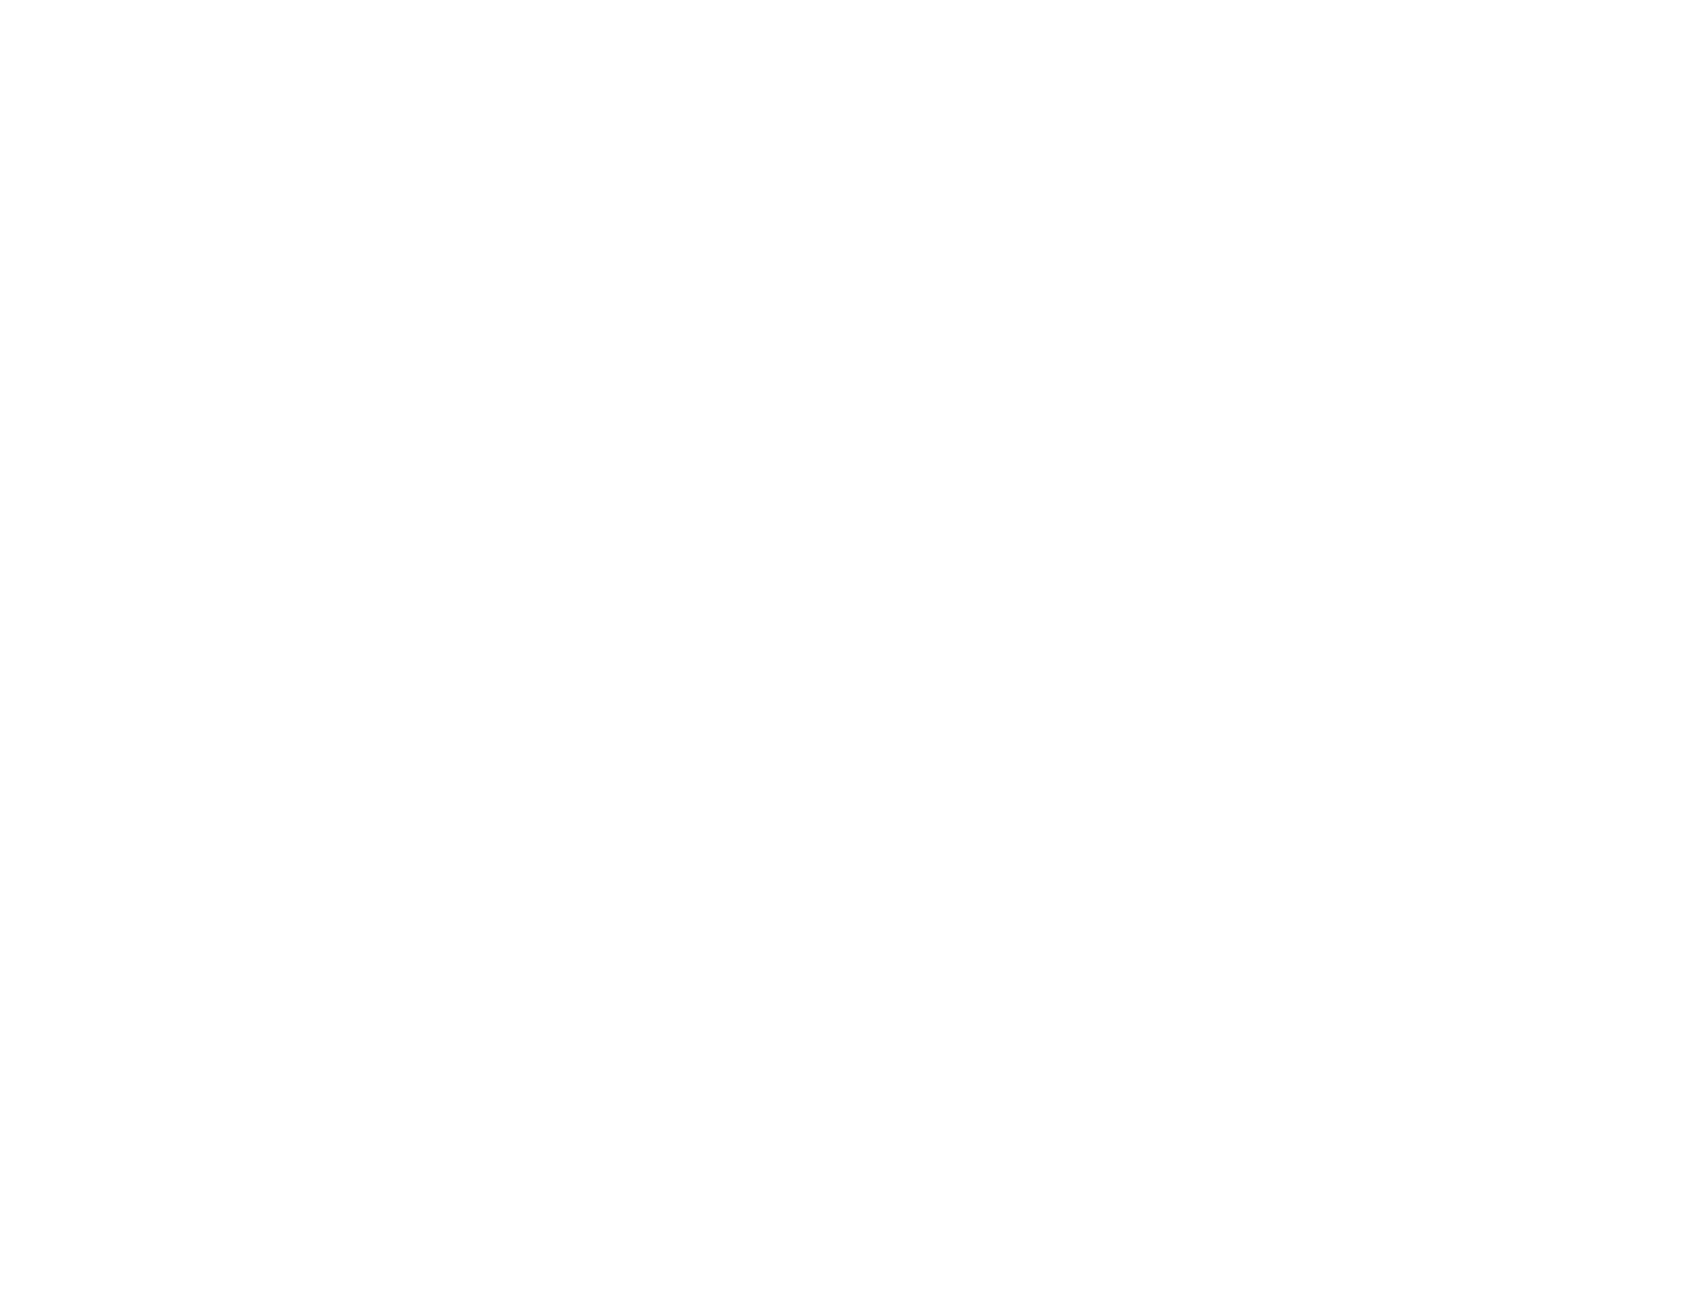

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


NameError: name 'r_time' is not defined

In [29]:
#Beta_HoR_Existence


fig = plt.figure(figsize=(8.5,6.5))
ax = fig.add_subplot(1,1,1)

ax1 = fig.add_subplot(2,2,1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax2 = fig.add_subplot(2,2,2)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax3 = fig.add_subplot(2,2,3)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax4 = fig.add_subplot(2,2,4)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


ax.set_ylabel(r'$\textbf{Proportion of Energy in Initial State}$')
ax.set_xlabel(r'$\textbf{Time}$')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(.5,-.12)
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])

ax.plot([],[],'o', color='r',label='1oR')
ax.plot([],[],'o', color='b',label='2oR')
ax.plot([],[],'o', color='m',label='3oR')
ax.plot([],[],'o', color='g',label='4oR')


ax1.plot(t,energy_prop[:,0],color='k')
ax1.plot(r_time[:],r_envelope[:],'o', color='r')

ax2.plot(t,energy_prop[:,0],color='k',linewidth=.5)
ax2.plot(r_time[:],r_envelope[:],'--o', color='r',linewidth=1)
ax2.plot(sr_time[:],sr_envelope[:],'o', color='b')

ax3.plot(t,energy_prop[:,0],color='k',linewidth=.5)
ax3.plot(r_time[:],r_envelope[:],'o', color='r',markersize=3)
ax3.plot(sr_time[:],sr_envelope[:],'--o', color='b',linewidth=1)
ax3.plot(ssr_time[:],ssr_envelope[:],'o', color='m')

ax4.plot(t,energy_prop[:,0],color='k',linewidth=.5)
ax4.plot(r_time[:],r_envelope[:],'o', color='r',markersize=3)
ax4.plot(sr_time[:],sr_envelope[:],'o', color='b',markersize=3)
ax4.plot(ssr_time[:],ssr_envelope[:],'--o', color='m',linewidth=1)
ax4.plot(sssr_time[:],sssr_envelope[:],'o', color='g')


ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax3.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax4.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)

ax1.set_xlim(left=0,right=3.8*t_r)
ax2.set_xlim(left=0,right=3.8*t_sr)
ax3.set_xlim(left=0,right=3.8*t_ssr)
ax4.set_xlim(left=0,right=3.8*t_sssr)

ax1.set_ylim(bottom=0,top=1.03)
ax2.set_ylim(bottom=.94,top=1.005)
ax3.set_ylim(bottom=.99,top= 1.002)
ax4.set_ylim(bottom=.998,top=1.00015)


ax1.axes.yaxis.set_ticks([0,.25,.50,.75,1])
ax2.axes.yaxis.set_ticks([.94,.97,1])

ax3.axes.yaxis.set_ticks([.99,.995,1])
ax3.axes.yaxis.set_ticklabels([.99,.995,1])

ax4.axes.yaxis.set_ticks([.998,.999,1])
ax4.axes.yaxis.set_ticklabels([.998,.999,1])



ax1.axes.xaxis.set_ticks([0,7500,15000])

ax2.axes.xaxis.set_ticks([0,25000,50000])

ax3.axes.xaxis.set_ticks([0,50000,100000])

ax4.axes.xaxis.set_ticks([0,1000000,2000000])

ax1.annotate("(a)", xy=(0.86, 0.86), xycoords="axes fraction")
ax2.annotate("(b)", xy=(0.86, 0.86), xycoords="axes fraction")
ax3.annotate("(c)", xy=(0.86, 0.86), xycoords="axes fraction")
ax4.annotate("(d)", xy=(0.86, 0.86), xycoords="axes fraction")


leg=ax.legend(loc=(0,-0.3),handlelength=1,framealpha=1,prop={'size':18},ncol=5,frameon=False)
for legobj in leg.legendHandles:
    legobj._legmarker.set_markersize(12.0)
    
plt.tight_layout()

fig.savefig('bHoR.png', bbox_inches='tight', dpi=500)


<IPython.core.display.Javascript object>


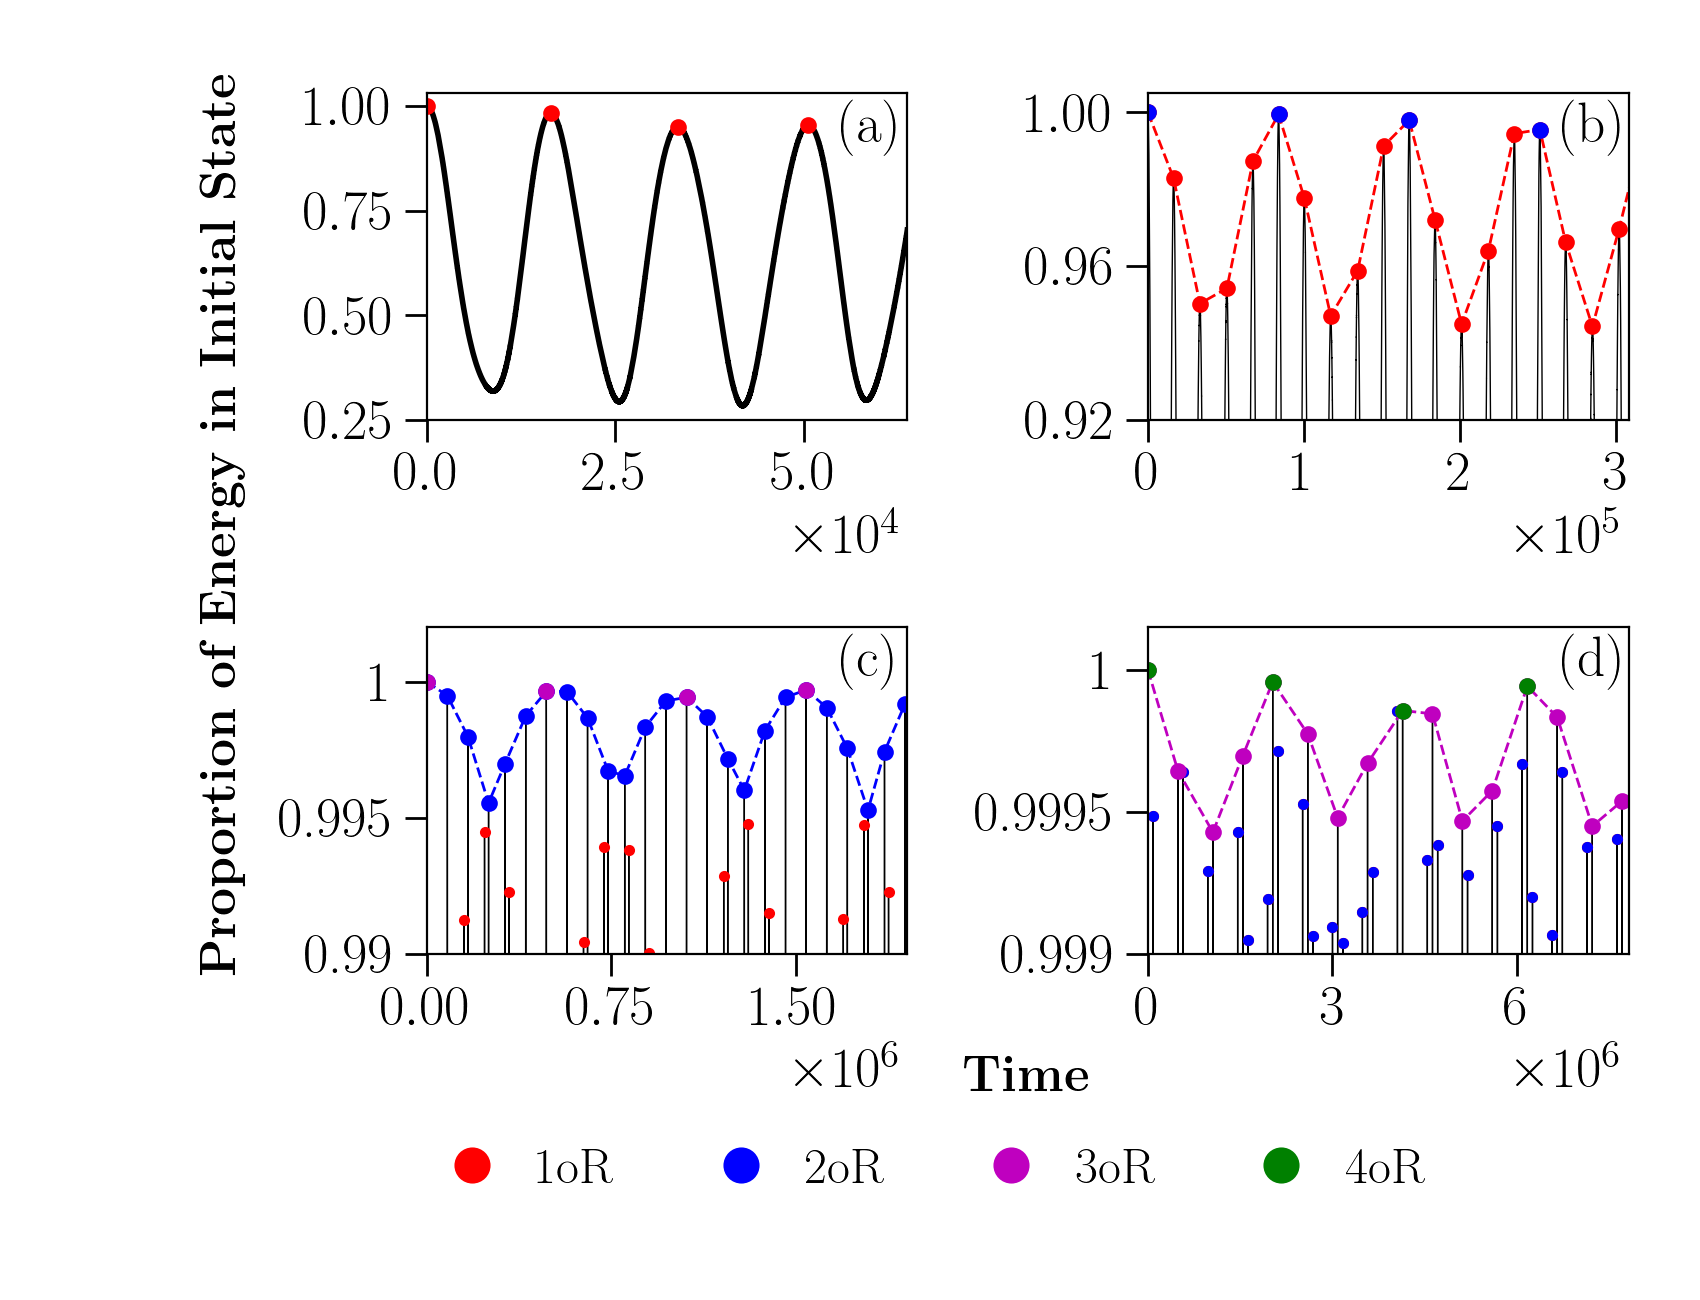

T_1oR: 16768.52198864843
T_2oR: 81106.47947726658
T_3oR: 514230.33264316624
T_4oR: 2056923.3317981476


In [11]:
#Alpha_HoR_Existence


fig = plt.figure(figsize=(8.5,6.5))
ax = fig.add_subplot(1,1,1)

ax1 = fig.add_subplot(2,2,1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax2 = fig.add_subplot(2,2,2)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax3 = fig.add_subplot(2,2,3)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax4 = fig.add_subplot(2,2,4)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


ax.set_ylabel(r'$\textbf{Proportion of Energy in Initial State}$')
ax.set_xlabel(r'$\textbf{Time}$')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(.5,-.12)
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])

ax.plot([],[],'o', color='r',label='1oR')
ax.plot([],[],'o', color='b',label='2oR')
ax.plot([],[],'o', color='m',label='3oR')
ax.plot([],[],'o', color='g',label='4oR')


ax1.plot(t,energy_prop[:,0],color='k')
ax1.plot(r_time[:],r_envelope[:],'o', color='r')

ax2.plot(t,energy_prop[:,0],color='k',linewidth=.5)
ax2.plot(r_time[:],r_envelope[:],'--o', color='r',linewidth=1)
ax2.plot(sr_time[:],sr_envelope[:],'o', color='b')

ax3.plot(t,energy_prop[:,0],color='k',linewidth=.5)
ax3.plot(r_time[:],r_envelope[:],'o', color='r',markersize=3)
ax3.plot(sr_time[:],sr_envelope[:],'--o', color='b',linewidth=1)
ax3.plot(ssr_time[:],ssr_envelope[:],'o', color='m')

ax4.plot(t,energy_prop[:,0],color='k',linewidth=.5)
ax4.plot(r_time[:],r_envelope[:],'o', color='r',markersize=3)
ax4.plot(sr_time[:],sr_envelope[:],'o', color='b',markersize=3)
ax4.plot(ssr_time[:],ssr_envelope[:],'--o', color='m',linewidth=1)
ax4.plot(sssr_time[:],sssr_envelope[:],'o', color='g')

ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax3.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax4.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
#ax5.tick_params(which='both',direction='in', length=8, width=1,top=True, right=True)

ax1.annotate("(a)", xy=(0.86, 0.85), xycoords="axes fraction")
ax2.annotate("(b)", xy=(0.86, 0.85), xycoords="axes fraction")
ax3.annotate("(c)", xy=(0.86, 0.85), xycoords="axes fraction")
ax4.annotate("(d)", xy=(0.86, 0.85), xycoords="axes fraction")

ax1.set_xlim(left=0,right=3.8*t_r)
ax2.set_xlim(left=0,right=3.8*t_sr)
ax3.set_xlim(left=0,right=3.8*t_ssr)
ax4.set_xlim(left=0,right=3.8*t_sssr)

ax1.set_ylim(bottom=.25,top=1.03)
ax2.set_ylim(bottom=.94,top=1.005)
ax3.set_ylim(bottom=.99,top= 1.002)
ax4.set_ylim(bottom=.999,top=1.00015)


ax1.axes.yaxis.set_ticks([.25,.50,.75,1])
ax2.axes.yaxis.set_ticks([.92,.96,1])

ax3.axes.yaxis.set_ticks([.99,.995,1])
ax3.axes.yaxis.set_ticklabels([.99,.995,1])

ax4.axes.yaxis.set_ticks([.999,.9995,1])
ax4.axes.yaxis.set_ticklabels([.999,.9995,1])



ax1.axes.xaxis.set_ticks([0,25000,50000])

ax2.axes.xaxis.set_ticks([0,100000,200000,300000])

ax3.axes.xaxis.set_ticks([0,750000,1500000])

ax4.axes.xaxis.set_ticks([0,3000000,6000000])



print('T_1oR: ' + str(t_r))
print('T_2oR: ' + str(t_sr))
print('T_3oR: ' + str(t_ssr))
print('T_4oR: ' + str(t_sssr))


leg=ax.legend(loc=(0,-0.3),handlelength=1,framealpha=1,prop={'size':18},ncol=5,frameon=False)
for legobj in leg.legendHandles:
    legobj._legmarker.set_markersize(12.0)
plt.tight_layout()

#fig.savefig('aHoR.png', bbox_inches='tight', dpi=500)


In [ ]:
#Spectral_entropy_general


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
energy_nm_norm = energy_nm_/energy_nm_[0,0]
if parameters[1] == 3:
    spectral_energy = -np.sum(energy_nm_norm[:,:]*np.log(abs(energy_nm_norm[:,:])),axis=1)
    norm_spectral_energy = (spectral_energy-np.log(parameters[0]))/(spectral_energy[0]-np.log(parameters[0]))
    print(norm_spectral_energy[-1])
    ax.axhline(y=(1-.5772)/(np.log(parameters[0])-spectral_energy[0]),linestyle='--',color='black')
    ax.semilogx(t,time_average_array(norm_spectral_energy,T),color='red')

if parameters[1] == 4:
    spectral_energy = -np.sum(energy_nm_norm[:,::2]*np.log(abs(energy_nm_norm[:,::2])),axis=1)
    norm_spectral_energy = (spectral_energy-np.log(np.ceil(parameters[0]/2)))/(spectral_energy[0]-np.log(np.ceil(parameters[0]/2)))
    ax.axhline(y=(1-.5772)/(np.log(np.ceil(parameters[0]/2))-spectral_energy[0]),linestyle='--',color='black')
    ax.semilogx(t,time_average_array(norm_spectral_energy,T),color='blue')

    
ax.set_xlabel(r'$\textbf{Time}$')
ax.set_ylabel(r'$\boldsymbol{\bar{\eta}(t)}$')
ax.tick_params(which='both',direction='in', length=8, width=1,top=True, right=True)
ax.set_ylim(bottom=0)




In [ ]:
fig=plt.figure(figsize=(6,8))
ax=fig.add_subplot(2,1,1)

ax.set_ylabel(r'$\boldsymbol{E\beta}$')
ax.set_xlabel(r'$\textbf{Time}$')

ax.plot(t,b_energy1[:],color='blue',linewidth=0.08,label=r'$E\beta=0.5735$')
ax.plot(t,b_energy2[:],color='forestgreen',linewidth=0.08,label=r'$E\beta=0.5797$')
ax.plot(t,b_energy3[:],color='darkviolet',linewidth=0.08,label=r'$E\beta=0.5865$')

ax.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)

ax.set_xlim(left=0,right=10000000)
ax.set_ylim(bottom=0,top=.5865)
leg = ax.legend(loc=(-.15,-.34),handlelength=1,framealpha=1,prop={'size':14},ncol=3,frameon=False)
for legobj in leg.legendHandles:
    legobj.set_linewidth(6.0)

plt.tight_layout()



##########################################################################################################



In [ ]:
#Alpha_SR_brk


#t3=t
#a_energy3 = energy_nm_


fig=plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(3,1,1)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

ax2 = fig.add_subplot(3,1,2)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

ax3 = fig.add_subplot(3,1,3)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

ax3.set_xlabel(r'$\textbf{Time}$')

ax1.axes.xaxis.set_ticklabels([])
ax2.axes.xaxis.set_ticklabels([])


ax1.plot([],[],label=r'$E\alpha^{2}=0.005$')
ax2.plot([],[],label=r'$E\alpha^{2}=0.015$')
ax3.plot([],[],label=r'$E\alpha^{2}=0.037$')

ax1.plot(t1,a_energy1[:,0],color='r',linewidth=0.2)
ax2.plot(t2,a_energy2[:,0],color='r',linewidth=0.2)
ax3.plot(t3,a_energy3[:],color='r',linewidth=0.2)

ax1.annotate("(a)", xy=(0.02, 0.86), xycoords="axes fraction")
ax2.annotate("(b)", xy=(0.02, 0.86), xycoords="axes fraction")
ax3.annotate("(c)", xy=(0.02, 0.86), xycoords="axes fraction")
ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax3.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax1.set_xlim(left=0,right=2000000)
ax2.set_xlim(left=0,right=2000000)
ax3.set_xlim(left=0,right=2000000)
ax1.set_ylim(bottom=0,top=.006)
ax2.set_ylim(bottom=0,top=.017)
ax3.set_ylim(bottom=0,top=.038)

ax1.set_ylabel(r'$\boldsymbol{E_{1}\alpha^{2}}$')
ax2.set_ylabel(r'$\boldsymbol{E_{1}\alpha^{2}}$')
ax3.set_ylabel(r'$\boldsymbol{E_{1}\alpha^{2}}$')

ax1.legend(loc=(.05,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)
ax2.legend(loc=(.05,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)
ax3.legend(loc=(.05,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)

plt.tight_layout()

##########################################################################################################

fig.savefig('a_SR_brk.png', bbox_inches='tight', dpi=500)


<IPython.core.display.Javascript object>


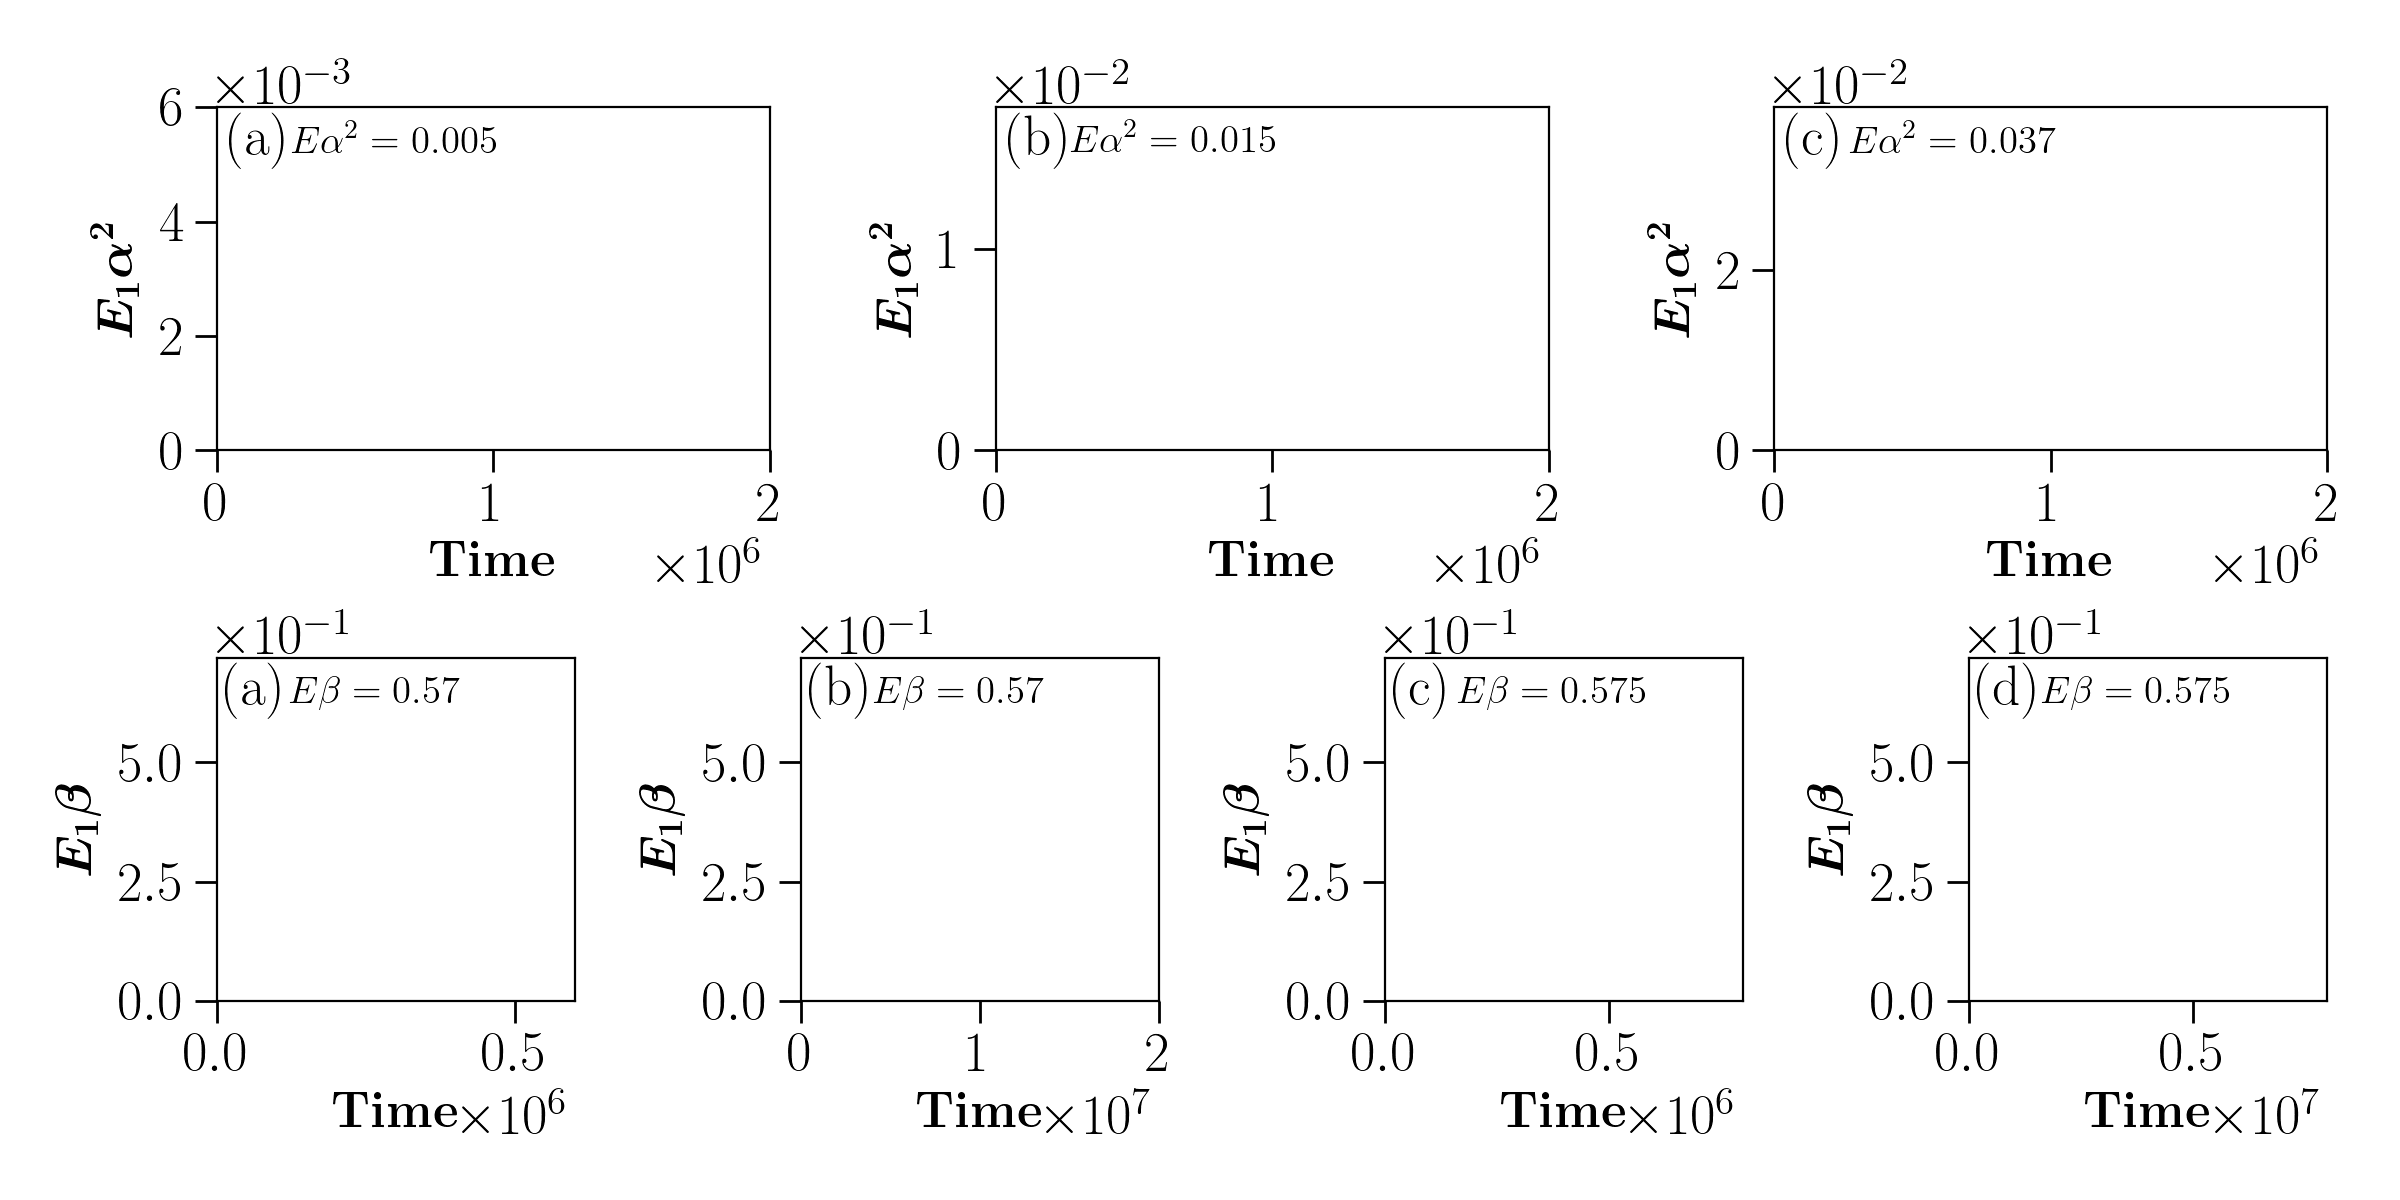

In [13]:
#GW stuff


#t3=t
#a_energy3 = energy_nm_
#b_t2=t
#b_energy2 = energy_nm_

fig=plt.figure(figsize=(12,6))
ax1 = plt.subplot2grid((2, 12), (0, 0), colspan=4)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax2 = plt.subplot2grid((2, 12), (0, 4), colspan=4)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax3 = plt.subplot2grid((2, 12), (0, 8), colspan=4)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax4 = plt.subplot2grid((2, 12), (1, 0), colspan=3)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax5 = plt.subplot2grid((2, 12), (1, 3), colspan=3)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax6 = plt.subplot2grid((2, 12), (1, 6), colspan=3)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax7 = plt.subplot2grid((2, 12), (1, 9), colspan=3)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

ax1.set_xlabel(r'$\textbf{Time}$')
ax2.set_xlabel(r'$\textbf{Time}$')
ax3.set_xlabel(r'$\textbf{Time}$')
ax4.set_xlabel(r'$\textbf{Time}$')
ax5.set_xlabel(r'$\textbf{Time}$')
ax6.set_xlabel(r'$\textbf{Time}$')
ax7.set_xlabel(r'$\textbf{Time}$')



ax1.plot([],[],label=r'$E\alpha^{2}=0.005$')
ax2.plot([],[],label=r'$E\alpha^{2}=0.015$')
ax3.plot([],[],label=r'$E\alpha^{2}=0.037$')
ax4.plot([],[],label=r'$E\beta=0.57$')
ax5.plot([],[],label=r'$E\beta=0.57$')
ax6.plot([],[],label=r'$E\beta=0.575$')
ax7.plot([],[],label=r'$E\beta=0.575$')




#ax1.plot(a_t1,a_energy1[:,0],color='r',linewidth=0.2)
#ax2.plot(a_t2,a_energy2[:,0],color='r',linewidth=0.2)
#ax3.plot(a_t3,a_energy3[:],color='r',linewidth=0.2)
#ax4.plot(b_t1,b_energy1,color='b',linewidth=0.1)
#ax5.plot(b_t1,b_energy1,color='b',linewidth=0.05)
#ax6.plot(b_t2,b_energy2,color='b',linewidth=0.1)
#ax7.plot(b_t2,b_energy2,color='b',linewidth=0.05)





ax1.annotate("(a)", xy=(0.02, 0.86), xycoords="axes fraction")
ax2.annotate("(b)", xy=(0.02, 0.86), xycoords="axes fraction")
ax3.annotate("(c)", xy=(0.02, 0.86), xycoords="axes fraction")
ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax3.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax1.set_xlim(left=0,right=2000000)
ax2.set_xlim(left=0,right=2000000)
ax3.set_xlim(left=0,right=2000000)
ax1.set_ylim(bottom=0,top=.006)
ax2.set_ylim(bottom=0,top=.017)
ax3.set_ylim(bottom=0,top=.038)
ax4.annotate("(a)", xy=(0.02, 0.86), xycoords="axes fraction")
ax5.annotate("(b)", xy=(0.02, 0.86), xycoords="axes fraction")
ax4.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax5.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax5.set_xlim(left=0,right=20000000)
ax4.set_xlim(left=0,right=600000)
ax4.set_ylim(bottom=0,top=.72)
ax5.set_ylim(bottom=0,top=.72)
ax6.annotate("(c)", xy=(0.02, 0.86), xycoords="axes fraction")
ax7.annotate("(d)", xy=(0.02, 0.86), xycoords="axes fraction")
ax6.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax7.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax7.set_xlim(left=0,right=8000000)
ax6.set_xlim(left=0,right=800000)
ax6.set_ylim(bottom=0,top=.72)
ax7.set_ylim(bottom=0,top=.72)

ax1.set_ylabel(r'$\boldsymbol{E_{1}\alpha^{2}}$')
ax2.set_ylabel(r'$\boldsymbol{E_{1}\alpha^{2}}$')
ax3.set_ylabel(r'$\boldsymbol{E_{1}\alpha^{2}}$')

ax1.legend(loc=(.05,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)
ax2.legend(loc=(.05,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)
ax3.legend(loc=(.05,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)

ax4.legend(loc=(.07,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)
ax5.legend(loc=(.07,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)
ax6.legend(loc=(.07,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)
ax7.legend(loc=(.07,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)



ax4.set_ylabel(r'$\boldsymbol{E_{1}\beta}$')
ax5.set_ylabel(r'$\boldsymbol{E_{1}\beta}$')
ax6.set_ylabel(r'$\boldsymbol{E_{1}\beta}$')
ax7.set_ylabel(r'$\boldsymbol{E_{1}\beta}$')

plt.tight_layout()

##########################################################################################################

#fig.savefig('b_SR_brk.png', bbox_inches='tight', dpi=500)


In [ ]:
#Beta_SR_brk

b_t2=t
b_energy2 = energy_nm_

fig=plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(2,2,1)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax2 = fig.add_subplot(2,2,2)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax3 = fig.add_subplot(2,2,3)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax4 = fig.add_subplot(2,2,4)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

ax3.set_xlabel(r'$\textbf{Time}$')
ax4.set_xlabel(r'$\textbf{Time}$')

ax1.plot([],[],label=r'$E\beta=0.57$')
ax2.plot([],[],label=r'$E\beta=0.57$')
ax3.plot([],[],label=r'$E\beta=0.575$')
ax4.plot([],[],label=r'$E\beta=0.575$')

ax1.plot(b_t1,b_energy1,color='b',linewidth=0.1)
ax2.plot(b_t1,b_energy1,color='b',linewidth=0.05)

ax3.plot(b_t2,b_energy2,color='b',linewidth=0.1)
ax4.plot(b_t2,b_energy2,color='b',linewidth=0.05)

ax1.annotate("(a)", xy=(0.02, 0.86), xycoords="axes fraction")
ax2.annotate("(b)", xy=(0.02, 0.86), xycoords="axes fraction")
ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.set_xlim(left=0,right=20000000)
ax1.set_xlim(left=0,right=600000)
ax1.set_ylim(bottom=0,top=.72)
ax2.set_ylim(bottom=0,top=.72)
ax3.annotate("(c)", xy=(0.02, 0.86), xycoords="axes fraction")
ax4.annotate("(d)", xy=(0.02, 0.86), xycoords="axes fraction")
ax3.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax4.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax4.set_xlim(left=0,right=8000000)
ax3.set_xlim(left=0,right=800000)
ax3.set_ylim(bottom=0,top=.72)
ax4.set_ylim(bottom=0,top=.72)

ax1.legend(loc=(.07,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)
ax2.legend(loc=(.07,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)
ax3.legend(loc=(.07,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)
ax4.legend(loc=(.07,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)

ax1.set_ylabel(r'$\boldsymbol{E_{1}\beta}$')
ax3.set_ylabel(r'$\boldsymbol{E_{1}\beta}$')

plt.tight_layout()

##########################################################################################################

fig.savefig('b_SR_brk.png', bbox_inches='tight', dpi=500)

In [ ]:
#Beta_SR_brk_18


b_t2=t
b_energy2 = energy_nm_


fig=plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(2,2,2)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax2 = fig.add_subplot(2,2,1)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax3 = fig.add_subplot(2,2,4)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax4 = fig.add_subplot(2,2,3)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))


ax3.set_xlabel(r'$\textbf{Time}$')
ax4.set_xlabel(r'$\textbf{Time}$')


ax1.plot(b_t1,b_energy1,color='b',linewidth=0.2)
ax2.plot(b_t1,b_energy1,color='b',linewidth=0.4)

ax3.plot(b_t2,b_energy2,color='b',linewidth=0.3)
ax4.plot(b_t2,b_energy2,color='b',linewidth=0.4)


ax1.annotate("(b)", xy=(0.82, 0.86), xycoords="axes fraction")
ax2.annotate("(a)", xy=(0.02, 0.86), xycoords="axes fraction")
ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.set_xlim(left=0,right=50000)
ax1.set_xlim(left=0,right=300000)
ax1.set_ylim(bottom=0,top=1.1)
ax2.set_ylim(bottom=0,top=1.3)
ax3.annotate("(d)", xy=(0.82, 0.86), xycoords="axes fraction")
ax4.annotate("(c)", xy=(0.02, 0.86), xycoords="axes fraction")
ax3.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax4.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax4.set_xlim(left=0,right=50000)
ax3.set_xlim(left=0,right=200000)
ax3.set_ylim(bottom=0,top=1.2)
ax4.set_ylim(bottom=0,top=1.4)


ax2.set_ylabel(r'$\boldsymbol{E_{1}\beta}$')
ax4.set_ylabel(r'$\boldsymbol{E_{1}\beta}$')

plt.tight_layout()

##########################################################################################################

fig.savefig('b_SR_brk_18.png', bbox_inches='tight', dpi=500)


In [ ]:
#mR_Zoom

fig=plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

ax2 = fig.add_subplot(2,3,4)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

ax3 = fig.add_subplot(2,3,5)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

ax4 = fig.add_subplot(2,3,6)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))



ax1.set_xlabel(r'$\textbf{Time}$')
ax2.set_xlabel(r'$\textbf{Time}$')
ax3.set_xlabel(r'$\textbf{Time}$')
ax4.set_xlabel(r'$\textbf{Time}$')


ax1.plot(t2,a_energy2[:,0],color='r',linewidth=.5)
ax2.plot(t2,a_energy2[:,0],color='r',linewidth=1)
ax3.plot(t2,a_energy2[:,0],color='r',linewidth=1)
ax4.plot(t2,a_energy2[:,0],color='r',linewidth=1)


# Create a Rectangle patch
rect1 = patches.Rectangle((316000,0.0002),324500-316000,.0147,linewidth=1.5,edgecolor='green',facecolor='none')
rect2 = patches.Rectangle((381000,0.0002),390000-381000,.0147,linewidth=1.5,edgecolor='darkviolet',facecolor='none')
rect3 = patches.Rectangle((410000,0.0002),419000-410000,.0147,linewidth=1.5,edgecolor='blue',facecolor='none')

# Add the patch to the Axes
ax1.add_patch(rect1)
ax1.add_patch(rect2)
ax1.add_patch(rect3)

ax1.annotate("(a)", xy=(0.02, 0.86), xycoords="axes fraction")
ax2.annotate("(b)", xy=(0.02, 0.86), xycoords="axes fraction")
ax3.annotate("(c)", xy=(0.02, 0.86), xycoords="axes fraction")
ax4.annotate("(d)", xy=(0.02, 0.86), xycoords="axes fraction")

ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax3.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax4.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)


ax1.set_xlim(left=245000,right=510000)
ax2.set_xlim(left=316000,right=324500)
ax3.set_xlim(left=381000,right=390000)
ax4.set_xlim(left=410000,right=419000)


ax2.axes.xaxis.set_ticks([317000,323000])
ax3.axes.xaxis.set_ticks([383000,388000])
ax4.axes.xaxis.set_ticks([412000,417000])


ax2.axes.yaxis.set_ticks([0,.005,.01,.015])
ax3.axes.yaxis.set_ticks([0,.005,.01,.015])
ax4.axes.yaxis.set_ticks([0,.005,.01,.015])

ax2.set_ylim(bottom=0,top=.015)
ax3.set_ylim(bottom=0,top=.015)
ax4.set_ylim(bottom=0,top=.015)

ax1.set_ylim(bottom=0,top=.015)
ax3.axes.yaxis.set_ticklabels([])
ax4.axes.yaxis.set_ticklabels([])

ax1.set_ylabel(r'$\boldsymbol{E_{1}\alpha^{2}}$')
ax2.set_ylabel(r'$\boldsymbol{E_{1}\alpha^{2}}$')


ax2.spines['bottom'].set_color('green')
ax2.spines['top'].set_color('green')
ax2.spines['left'].set_color('green')
ax2.spines['right'].set_color('green')

ax3.spines['bottom'].set_color('darkviolet')
ax3.spines['top'].set_color('darkviolet')
ax3.spines['left'].set_color('darkviolet')
ax3.spines['right'].set_color('darkviolet')

ax4.spines['bottom'].set_color('blue')
ax4.spines['top'].set_color('blue')
ax4.spines['left'].set_color('blue')
ax4.spines['right'].set_color('blue')

plt.tight_layout()
fig.savefig('a_SR_brk_zoom.png', bbox_inches='tight', dpi=500)

##########################################################################################################



In [ ]:
#SR_brk_entropy


#(a_t_3,a_norm_spectral_energy_3) = time_average_array(energy_nm_,t)

#a_equil= (1-.5772)/(np.log(parameters[0]))
#b_equil= (1-.5772)/(np.log(np.ceil(parameters[0]/2)))


fig=plt.figure(figsize=(5,8))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)

ax1.axhline(y=a_equil,linestyle='--',color='darkred',label=r'$\langle \eta \rangle$')
ax1.semilogx(a_t_1,a_norm_spectral_energy_1,color='red',label=r'$E\alpha^{2}=0.005$')
ax1.semilogx(a_t_2,a_norm_spectral_energy_2,color='darkorange',label=r'$E\alpha^{2}=0.015$')
ax1.semilogx(a_t_3,a_norm_spectral_energy_3,color='gold',label=r'$E\alpha^{2}=0.037$')

ax2.axhline(y=b_equil,linestyle='--',color='navy',label=r'$\langle \eta \rangle$')
ax2.semilogx(b_t_1,b_norm_spectral_energy_1,color='blue',label=r'$E\beta=0.57$')
ax2.semilogx(b_t_2,b_norm_spectral_energy_2,color='forestgreen',label=r'$E\beta=0.575$')
       
ax1.set_ylim(bottom=0,top=1)
ax2.set_ylim(bottom=0,top=1)


ax1.set_xlim(right=2000000)
ax2.set_xlim(right=50000000)
ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)

ax1.set_ylabel(r'$\boldsymbol{\bar{\eta}(t)}$')
ax2.set_xlabel(r'$\boldsymbol{\log_{10}(t)}$')
ax2.set_ylabel(r'$\boldsymbol{\bar{\eta}(t)}$')

ax1.annotate("(a)", xy=(0.9, 0.9), xycoords="axes fraction")
ax2.annotate("(b)", xy=(0.9, 0.9), xycoords="axes fraction")

ax1.axes.xaxis.set_ticks([10,10**2,10**3,10**4,10**5,10**6])
ax1.axes.xaxis.set_ticklabels([r'$1$',r'$2$',r'$3$',r'$4$',r'$5$',r'$6$'])
ax2.axes.xaxis.set_ticks([10,10**2,10**3,10**4,10**5,10**6,10**7])
ax2.axes.xaxis.set_ticklabels([r'$1$',r'$2$',r'$3$',r'$4$',r'$5$',r'$6$',r'$7$'])

leg = ax1.legend(loc=(0,0.12),handlelength=1.3,framealpha=1,prop={'size':14},ncol=1,frameon=False)   
leg = ax2.legend(loc=(0,0.16),handlelength=1.3,framealpha=1,prop={'size':14},ncol=1,frameon=False)

    
plt.tight_layout()

fig.savefig('HoR_meta.png', bbox_inches='tight', dpi=500)


In [ ]:
TM4_t=t
TM4_e=.07927*energy_prop[:,0]
TM4_rt=r_time[:]
TM4_re=.07927*r_envelope[:]
TM4_2rt=sr_time[:]
TM4_2re=.07927*sr_envelope[:]




fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax1 = fig.add_subplot(2,2,1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax2 = fig.add_subplot(2,2,2)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax3 = fig.add_subplot(2,2,3)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax4 = fig.add_subplot(2,2,4)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


ax1.set_ylabel(r'$\textbf{Energy}$')
ax3.set_xlabel(r'$\textbf{Time}$')
ax3.set_ylabel(r'$\textbf{Energy}$')
ax4.set_xlabel(r'$\textbf{Time}$')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])

ax.plot([],[],'o', color='r',label='1oR')
ax.plot([],[],'o', color='b',label='2oR')


ax1.plot(TM1_t,TM1_e,color='k',linewidth=1)
ax1.plot(TM1_rt,TM1_re,'--o', color='r',linewidth=1)
ax1.plot(TM1_2rt,TM1_2re,'o', color='b')

ax2.plot(TM2_t,TM2_e,color='k',linewidth=1)
ax2.plot(TM2_rt,TM2_re,'--o', color='r',linewidth=1)
ax2.plot(TM2_2rt,TM2_2re,'o', color='b')

ax3.plot(TM3_t,TM3_e,color='k',linewidth=1)
ax3.plot(TM3_rt,TM3_re,'--o', color='r',linewidth=1)
ax3.plot(TM3_2rt,TM3_2re,'o', color='b')

ax4.plot(TM4_t,TM4_e,color='k',linewidth=1)
ax4.plot(TM4_rt,TM4_re,'--o', color='r',linewidth=1)
ax4.plot(TM4_2rt,TM4_2re,'o', color='b')


ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax3.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax4.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)


ax2.axes.yaxis.set_ticklabels([])
ax4.axes.yaxis.set_ticklabels([])

ax1.axes.xaxis.set_ticklabels([])
ax2.axes.xaxis.set_ticklabels([])



ax1.annotate("(a)", xy=(0.88, 0.88), xycoords="axes fraction")
ax2.annotate("(b)", xy=(0.88, 0.88), xycoords="axes fraction")
ax3.annotate("(c)", xy=(0.88, 0.88), xycoords="axes fraction")
ax4.annotate("(d)", xy=(0.88, 0.88), xycoords="axes fraction")

ax1.set_ylim(bottom=0.055,top=.084)
ax2.set_ylim(bottom=0.055,top=.084)
ax3.set_ylim(bottom=0.055,top=.084)
ax4.set_ylim(bottom=0.055,top=.084)

ax1.set_xlim(left=0,right=200000)
ax2.set_xlim(left=0,right=200000)
ax3.set_xlim(left=0,right=200000)
ax4.set_xlim(left=0,right=200000)

ax1.axes.xaxis.set_ticks([0,50000,100000,150000,200000])
ax2.axes.xaxis.set_ticks([0,50000,100000,150000,200000])
ax3.axes.xaxis.set_ticks([0,50000,100000,150000,200000])
ax4.axes.xaxis.set_ticks([0,50000,100000,150000,200000])


leg=ax.legend(loc=(0.31,-0.25),handlelength=1,framealpha=1,prop={'size':18},ncol=5,frameon=False)
for legobj in leg.legendHandles:
    legobj._legmarker.set_markersize(12.0)

plt.tight_layout()

fig.savefig('TM.png', bbox_inches='tight', dpi=500)


In [ ]:
#Alpha Nested
#t2=t
#e2= energy_prop
#r_time2 = r_time
#sr_time2 = sr_time
#ssr_time2 = ssr_time
#sssr_time2 = sssr_time
#r_envelope2 = r_envelope
#sr_envelope2 = sr_envelope
#ssr_envelope2 = ssr_envelope
#sssr_envelope2 = sssr_envelope

fig = plt.figure(figsize=(8.5,6.5))
ax = fig.add_subplot(1,1,1)
ax1 = fig.add_subplot(2,2,1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax1z = fig.add_subplot(2,2,2)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax2 = fig.add_subplot(2,2,3)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax2z = fig.add_subplot(2,2,4)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])

ax.set_ylabel(r'$\textbf{Proportion of Energy in Initial State}$')
ax.set_xlabel(r'$\textbf{Time}$')
ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(.5,-.12)

ax.plot([],[],'o', color='r',label='1oR')
ax.plot([],[],'o', color='b',label='2oR')
ax.plot([],[],'o', color='m',label='3oR')
ax.plot([],[],'o', color='g',label='4oR')

ax1.plot(t,energy_prop[:,0],color='k',linewidth=.5)
ax1.plot(r_time[:],r_envelope[:],'o', color='r',markersize=3)
ax1.plot(sr_time[:],sr_envelope[:],'o', color='b',markersize=3)
ax1.plot(ssr_time[:],ssr_envelope[:],'--o', color='m',linewidth=1)
ax1.plot(sssr_time[:],sssr_envelope[:],'o', color='g')

ax1z.plot(t,energy_prop[:,0],color='k',linewidth=.5)
ax1z.plot(r_time[:],r_envelope[:],'o', color='r',markersize=3)
ax1z.plot(sr_time[:],sr_envelope[:],'o', color='b',markersize=3)
ax1z.plot(ssr_time[:],ssr_envelope[:],'--o', color='m',linewidth=1)
ax1z.plot(sssr_time[:],sssr_envelope[:],'o', color='g')

ax2.plot(t2,e2[:,0],color='k',linewidth=.5)
ax2.plot(r_time2[:],r_envelope2[:],'o', color='r',markersize=3)
ax2.plot(sr_time2[:],sr_envelope2[:],'o', color='b',markersize=3)
ax2.plot(ssr_time2[:],ssr_envelope2[:],'--o', color='m',linewidth=1)
ax2.plot(sssr_time2[:],sssr_envelope2[:],'o', color='g')

ax2z.plot(t2,e2[:,0],color='k',linewidth=.5)
ax2z.plot(r_time2[:],r_envelope2[:],'o', color='r',markersize=3)
ax2z.plot(sr_time2[:],sr_envelope2[:],'o', color='b',markersize=3)
ax2z.plot(ssr_time2[:],ssr_envelope2[:],'--o', color='m',linewidth=1)
ax2z.plot(sssr_time2[:],sssr_envelope2[:],'o', color='g')



ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax1z.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2z.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)


ax1.annotate("(a)", xy=(0.87, 0.85), xycoords="axes fraction")
ax1z.annotate("(b)", xy=(0.87, 0.85), xycoords="axes fraction")
ax2.annotate("(c)", xy=(0.87, 0.85), xycoords="axes fraction")
ax2z.annotate("(d)", xy=(0.87, 0.85), xycoords="axes fraction")


ax1.set_xlim(left=0,right=3.08E6)
ax1z.set_xlim(left=0,right=1E6)

ax2.set_xlim(left=0,right=3.67E7)
ax2z.set_xlim(left=0,right=5E6)

ax1.set_ylim(bottom=.9985,top=1.0005)
ax1z.set_ylim(bottom=.9992,top=1)

ax2.set_ylim(bottom=.9985,top=1.0005)
ax2z.set_ylim(bottom=.99983,top=1)



ax1z.axes.xaxis.set_ticks([0,500000,1000000])

ax2z.axes.xaxis.set_ticks([0,2000000,4000000])

ax2.axes.xaxis.set_ticks([0,10000000,20000000,30000000])

ax1.axes.xaxis.set_ticks([0,1250000,2500000])

ax2z.axes.yaxis.set_ticks([.9999,1])
ax2z.axes.yaxis.set_ticklabels([.9999,1])


leg=ax.legend(loc=(0,-0.3),handlelength=1,framealpha=1,prop={'size':18},ncol=5,frameon=False)
for legobj in leg.legendHandles:
    legobj._legmarker.set_markersize(12.0)

    
plt.tight_layout()


fig.savefig('a_nested.png', bbox_inches='tight', dpi=500)


In [ ]:
#Beta Nested
#t2=t
#e2= energy_prop
#r_time2 = r_time
#sr_time2 = sr_time
#ssr_time2 = ssr_time
#sssr_time2 = sssr_time
#r_envelope2 = r_envelope
#sr_envelope2 = sr_envelope
#ssr_envelope2 = ssr_envelope
#sssr_envelope2 = sssr_envelope

fig = plt.figure(figsize=(8.5,6.5))
ax = fig.add_subplot(1,1,1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax1 = fig.add_subplot(2,2,1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax1z = fig.add_subplot(2,2,2)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax2 = fig.add_subplot(2,2,3)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax2z = fig.add_subplot(2,2,4)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))


ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])

ax.set_ylabel(r'$\textbf{Proportion of Energy in Initial State}$')
ax.set_xlabel(r'$\textbf{Time}$')
ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(.5,-.12)

ax.plot([],[],'o', color='r',label='1oR')
ax.plot([],[],'o', color='b',label='2oR')
ax.plot([],[],'o', color='m',label='3oR')
ax.plot([],[],'o', color='g',label='4oR')

ax1.plot(t,energy_prop[:,0],color='k',linewidth=.5)
ax1.plot(r_time[:],r_envelope[:],'o', color='r',markersize=3)
ax1.plot(sr_time[:],sr_envelope[:],'--o', color='b',linewidth=1)
ax1.plot(ssr_time[:],ssr_envelope[:],'o', color='m')
ax1.plot(sssr_time[:],sssr_envelope[:],'o', color='g')

ax1z.plot(t,energy_prop[:,0],color='k',linewidth=.5)
ax1z.plot(r_time[:],r_envelope[:],'o', color='r',markersize=3)
ax1z.plot(sr_time[:],sr_envelope[:],'--o', color='b',linewidth=1)
ax1z.plot(ssr_time[:],ssr_envelope[:],'o', color='m')
ax1z.plot(sssr_time[:],sssr_envelope[:],'o', color='g')

ax2.plot(t2,e2[:,0],color='k',linewidth=.5)
ax2.plot(r_time2[:],r_envelope2[:],'o', color='r',markersize=3)
ax2.plot(sr_time2[:],sr_envelope2[:],'--o', color='b',linewidth=1)
ax2.plot(ssr_time2[:],ssr_envelope2[:],'o', color='m')
ax2.plot(sssr_time2[:],sssr_envelope2[:],'o', color='g')

ax2z.plot(t2,e2[:,0],color='k',linewidth=.5)
ax2z.plot(r_time2[:],r_envelope2[:],'o', color='r',markersize=3)
ax2z.plot(sr_time2[:],sr_envelope2[:],'--o', color='b',linewidth=1)
ax2z.plot(ssr_time2[:],ssr_envelope2[:],'o', color='m')
ax2z.plot(sssr_time2[:],sssr_envelope2[:],'o', color='g')



ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax1z.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2z.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)


ax1.annotate("(a)", xy=(0.85, 0.84), xycoords="axes fraction")
ax1z.annotate("(b)", xy=(0.85, 0.84), xycoords="axes fraction")
ax2.annotate("(c)", xy=(0.85, 0.84), xycoords="axes fraction")
ax2z.annotate("(d)", xy=(0.85, 0.84), xycoords="axes fraction")


ax1.set_xlim(left=0,right=2.2E6)
ax1z.set_xlim(left=0,right=4.0E5)

ax2.set_xlim(left=0,right=1.0E8)
ax2z.set_xlim(left=0,right=5.0E5)

ax1.set_ylim(bottom=.999,top=1.0005)
ax1z.set_ylim(bottom=.9992,top=1.0005)

ax2.set_ylim(bottom=.999,top=1.0005)
ax2z.set_ylim(bottom=.99997,top=1.00001)



#ax1z.axes.xaxis.set_ticks([0,250000,500000,750000,1000000])

#ax2z.axes.xaxis.set_ticks([0,2000000,4000000])

#ax2.axes.xaxis.set_ticks([0,10000000,20000000,30000000])

#ax1.axes.xaxis.set_ticks([0,1250000,2500000])
ax1.axes.xaxis.set_ticks([0,1000000,2000000])

ax1z.axes.yaxis.set_ticks([.9995,1,1.0005])
ax1z.axes.yaxis.set_ticklabels(['.9995','1','1.0005'])

ax2z.axes.yaxis.set_ticks([.99997,1])
ax2z.axes.yaxis.set_ticklabels(['.99997','1'])


leg=ax.legend(loc=(0,-0.3),handlelength=1,framealpha=1,prop={'size':18},ncol=5,frameon=False)
for legobj in leg.legendHandles:
    legobj._legmarker.set_markersize(12.0)

    
plt.tight_layout()


fig.savefig('b_nested.png', bbox_inches='tight', dpi=500)

In [ ]:
times = [10,100,1000,10000,100000,1000000,10000000]
plt.figure()
plt.xlabel('k')
plt.ylabel(r'$\bar{E}_{k}(t)$')
if parameters[1] == 3:
    plt.axhline(y=parameters[3],linestyle='--',label='Equipartition',color='black',linewidth = .7)
    for j in times:
        i = find_nearest(T,j)
        time_average_E = integrate.simps(energy_nm[:i,:],T[:i],axis=0)/T[i]
        plt.semilogy(np.arange(1,len(energy_nm[0])+1),time_average_E,'-o',label='t= '+str(T[i]),markersize = 3.5)
    plt.title('N='+str(int(parameters[0]))+r', $\epsilon$='+str(parameters[3])+r', $\alpha$='+str(parameters[2]))
    plt.xlim(1,len(energy_nm[0]))
if parameters[1] == 4:
    plt.axhline(y=2*parameters[3],linestyle='--',label='Equipartition',color='black',linewidth = .7)
    for j in times:
        i = find_nearest(T,j)
        time_average_E = integrate.simps(energy_nm[:i,:],T[:i],axis=0)/T[i]
        plt.semilogy(np.arange(1,2*len(energy_nm[0])+1,2),time_average_E,'-o',label='t= '+str(T[i]),markersize = 3.5)
    plt.title('N='+str(int(parameters[0]))+r', $\epsilon$='+str(parameters[3])+r', $\beta$='+str(parameters[2]))
    plt.xlim(1,2*len(energy_nm[0]))
plt.legend(prop={'size':5})
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,3))
ax1 = fig.add_subplot(1,2,1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2 = fig.add_subplot(1,2,2)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


for i in range((4)):
    ax1.plot(t,energy_nm_[:,i]*16,label='Mode: '+str(i+1),linewidth = 1.5)
    ax2.plot(t,energy_nm_[:,i]*16,label='Mode: '+str(i+1),linewidth = 1.5)



ax1.annotate("(a)", xy=(0.04, 0.85), xycoords="axes fraction")
ax2.annotate("(b)", xy=(0.04, 0.85), xycoords="axes fraction")

ax2.set_ylim(bottom=0,top=.19)
ax1.set_ylim(bottom=0,top=.19)

#ax1.axes.xaxis.set_ticks([0,5000,10000,15000])
#ax1.axes.xaxis.set_ticklabels([0,r'$0.5\hspace{-2pt}\cdot\hspace{-2pt}10^{4}$',r'$10^{4}$'])

leg = ax1.legend(loc=(-0.3,-.7),handlelength=.5,framealpha=1,prop={'size':14},ncol=4,frameon=False)
for legobj in leg.legendHandles:
    legobj.set_linewidth(6.0)

ax1.set_xlim(left=0,right=3*1.66E3)
ax2.set_xlim(left=0,right=3*2.5E4)



ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.axes.yaxis.set_ticklabels([])

ax1.axes.xaxis.set_ticks([0,2500,5000])
ax2.axes.xaxis.set_ticks([0,25000,50000,75000])

ax2.axes.yaxis.set_ticks([0,.075,.15])
ax1.axes.yaxis.set_ticks([0,.075,.15])

ax1.set_ylabel(r'$\textbf{Energy}$')
ax1.set_xlabel(r'$\textbf{Time}$')
ax2.set_xlabel(r'$\textbf{Time}$')


plt.tight_layout()
fig.savefig('a_SR.png', bbox_inches='tight', dpi=500)


In [ ]:
fig = plt.figure(figsize=(6,3))
ax1 = fig.add_subplot(1,2,1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2 = fig.add_subplot(1,2,2)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))




ax1.plot(t,energy_nm_[:,0],label='Mode: '+str(0+1),linewidth = 1.5)
ax2.plot(t,energy_nm_[:,0],label='Mode: '+str(0+1),linewidth = 1.5)

ax1.plot(t,energy_nm_[:,1])
ax2.plot(t,energy_nm_[:,1])

ax1.plot(t,energy_nm_[:,2],label='Mode: '+str(2+1),linewidth = 1.5)
ax2.plot(t,energy_nm_[:,2],label='Mode: '+str(2+1),linewidth = 1.5)

ax1.plot(t,energy_nm_[:,3])
ax2.plot(t,energy_nm_[:,3])

ax1.plot(t,energy_nm_[:,4],label='Mode: '+str(4+1),linewidth = 1.5)
ax2.plot(t,energy_nm_[:,4],label='Mode: '+str(4+1),linewidth = 1.5)

ax1.plot(t,energy_nm_[:,5])
ax2.plot(t,energy_nm_[:,5])

ax1.plot(t,energy_nm_[:,6],label='Mode: '+str(6+1),linewidth = 1.5)
ax2.plot(t,energy_nm_[:,6],label='Mode: '+str(6+1),linewidth = 1.5)




ax1.annotate("(a)", xy=(0.04, 0.84), xycoords="axes fraction")
ax2.annotate("(b)", xy=(0.04, 0.84), xycoords="axes fraction")

ax2.set_ylim(bottom=0,top=.65)
ax1.set_ylim(bottom=0,top=.65)

#ax1.axes.xaxis.set_ticks([0,5000,10000,15000])
#ax1.axes.xaxis.set_ticklabels([0,r'$0.5\hspace{-2pt}\cdot\hspace{-2pt}10^{4}$',r'$10^{4}$'])

leg = ax1.legend(loc=(-.3,-0.7),handlelength=.5,framealpha=1,prop={'size':14},ncol=4,frameon=False)
for legobj in leg.legendHandles:
    legobj.set_linewidth(6.0)

ax1.set_xlim(left=0,right=3*4.99E3)
ax2.set_xlim(left=0,right=3*4.19E4)



ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.axes.yaxis.set_ticklabels([])
#ax1.axes.xaxis.set_ticks([0,2000,4000,15000])
#ax1.axes.xaxis.set_ticklabels(['0',r'$5\hspace{-2pt}\times\hspace{-2pt}10^{3}$',r'$10^{4}$'])
ax1.set_ylabel(r'$\textbf{Energy}$')
ax1.set_xlabel(r'$\textbf{Time}$')
ax2.set_xlabel(r'$\textbf{Time}$')
ax1.axes.xaxis.set_ticks([0,5000,10000,15000])
ax2.axes.xaxis.set_ticks([0,50000,100000])

ax1.axes.yaxis.set_ticks([0,.250000,.500000])
ax2.axes.yaxis.set_ticks([0,.250000,.500000])


plt.tight_layout()
fig.savefig('b_SR.png', bbox_inches='tight', dpi=500)


In [ ]:
energy_error = abs(np.sum(energy_nm_,axis=1)-np.sum(energy_nm_[0]))/np.sum(energy_nm_[0])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(t,energy_error)

In [ ]:
t127=t
a_energy127 = energy_nm_


fig=plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(3,1,1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax2 = fig.add_subplot(3,1,2)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax3 = fig.add_subplot(3,1,3)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax1.axes.xaxis.set_ticklabels([])
ax2.axes.xaxis.set_ticklabels([])


ax1.plot([],[],label=r'$N=31$')
ax2.plot([],[],label=r'$N=63$')
ax3.plot([],[],label=r'$N=127$')

ax1.plot(t1/32**3,a_energy1[:,0]*32**3,color='r',linewidth=0.2)
ax2.plot(t63/64**3,a_energy63[:,0]*64**3,color='r',linewidth=0.2)
ax3.plot(t127/128**3,a_energy127[:]*128**3,color='r',linewidth=0.2)

ax1.annotate("(a)", xy=(0.02, 0.86), xycoords="axes fraction")
ax2.annotate("(b)", xy=(0.02, 0.86), xycoords="axes fraction")
ax3.annotate("(c)", xy=(0.02, 0.86), xycoords="axes fraction")
ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax3.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax1.set_xlim(left=0,right=2000000/32**3)
ax2.set_xlim(left=0,right=2000000/32**3)
ax3.set_xlim(left=0,right=2000000/32**3)
ax1.set_ylim(bottom=0,top=520)
ax2.set_ylim(bottom=0,top=520)
ax3.set_ylim(bottom=0,top=520)
ax3.set_xlabel(r'$\boldsymbol{T^{(3)}/(N+1)^{3}}$')
ax1.set_ylabel(r'$\boldsymbol{E_{1}\alpha^{2}(N+1)^{3}}$')
ax2.set_ylabel(r'$\boldsymbol{E_{1}\alpha^{2}(N+1)^{3}}$')
ax3.set_ylabel(r'$\boldsymbol{E_{1}\alpha^{2}(N+1)^{3}}$')


ax1.axes.yaxis.set_ticks([0,250,500])
ax2.axes.yaxis.set_ticks([0,250,500])
ax3.axes.yaxis.set_ticks([0,250,500])

ax1.axes.xaxis.set_ticks([0,10,20,30,40,50,60])
ax2.axes.xaxis.set_ticks([0,10,20,30,40,50,60])
ax3.axes.xaxis.set_ticks([0,10,20,30,40,50,60])


ax1.legend(loc=(.05,0.82),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)
ax2.legend(loc=(.05,0.82),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)
ax3.legend(loc=(.05,0.82),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)

plt.tight_layout()

##########################################################################################################

fig.savefig('N_SR_brk.png', bbox_inches='tight', dpi=500)

In [ ]:
#TM3_t=t
#TM3_e=.07927*energy_prop[:,0]
#TM3_rt=r_time[:]
#TM3_re=.07927*r_envelope[:]
#TM3_2rt=sr_time[:]
#TM3_2re=.07927*sr_envelope[:]




img = mpimg.imread('/home/sal/DR.png')


fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax1 = fig.add_subplot(2,2,1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax2 = fig.add_subplot(2,2,2)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax3 = fig.add_subplot(2,1,2)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))



ax1.set_ylabel(r'$\textbf{1st Mode Energy}$')
ax1.set_xlabel(r'$\textbf{Time}$')
ax3.set_ylabel(r'$\textbf{1st Mode Energy}$')
ax3.set_xlabel(r'$\textbf{Time}$')
ax2.set_xlabel(r'$\textbf{Time}$')

ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])

ax.plot([],[],'o', color='r',label='1oR')
ax.plot([],[],'o', color='b',label='2oR')



ax1.plot(TM3_t,TM3_e,color='k',linewidth=1)
#ax1.plot(TM3_rt,TM3_re,'--o', color='r',linewidth=1)
#ax1.plot(TM3_2rt,TM3_2re,'o', color='b')

ax2.imshow(img,aspect='auto')

ax3.plot(TM3_t,TM3_e,color='k',linewidth=1)
ax3.plot(TM3_rt,TM3_re,'--o', color='r',linewidth=1)
ax3.plot(TM3_2rt,TM3_2re,'o', color='b')


ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax3.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)


ax2.axes.yaxis.set_ticks([101.8,211.62,321.43,431.24,541.06,650.87,760.69,870.5])
ax2.axes.yaxis.set_ticklabels(['',.06,'',.04,'',.02,'',0])

ax2.axes.xaxis.set_ticks([0,435.81355,871.627])
ax2.axes.xaxis.set_ticklabels([0,50000,100000])

ax1.axes.yaxis.set_ticks([0,.01,.02,.03,.04,.05,.06,.07])
ax1.axes.yaxis.set_ticklabels([0,'',.02,'',.04,'',.06,''])


ax1.annotate("(a)", xy=(-.2, .92), xycoords="axes fraction")
ax2.annotate("(b)", xy=(-.2, .92), xycoords="axes fraction")
ax3.annotate("(c)", xy=(0.94, 0.84), xycoords="axes fraction")




ax1.set_ylim(bottom=0,top=.07927)
ax3.set_ylim(bottom=0.075,top=.07927)

ax3.axes.yaxis.set_ticks([.075,.077135,.07927])


ax1.set_xlim(left=0,right=106066)
ax3.set_xlim(left=0,right=106066)


ax1.axes.xaxis.set_ticks([0,50000,100000])
ax3.axes.xaxis.set_ticks([0,50000,100000])




leg=ax.legend(loc=(0.31,-0.25),handlelength=1,framealpha=1,prop={'size':18},ncol=5,frameon=False)
for legobj in leg.legendHandles:
    legobj._legmarker.set_markersize(12.0)

plt.tight_layout()

fig.savefig('TM.png', bbox_inches='tight', dpi=500)





In [ ]:
#Energy_conservation


#b_energy_1=energy_nm_

fig = plt.figure(figsize=(8.5,6.5))
ax = fig.add_subplot(1,1,1)

ax1 = fig.add_subplot(2,2,1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax2 = fig.add_subplot(2,2,2)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax3 = fig.add_subplot(2,2,3)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax4 = fig.add_subplot(2,2,4)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


ax.set_ylabel(r'$\textbf{Relative Energy Error}$')
ax.set_xlabel(r'$\boldsymbol{\log_{10}(t)}$')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_label_coords(-.1,0.5)
ax.xaxis.set_label_coords(.5,-.12)
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])

ax1.plot([],[],label=r'$E\alpha^{2}=0.001$')
ax2.plot([],[],label=r'$E\alpha^{2}=0.01$')
ax3.plot([],[],label=r'$E\beta=0.01$')
ax4.plot([],[],label=r'$E\beta=0.1$')


ax1.semilogx(t,a_energy_001,color='r',linewidth=.1)

ax2.semilogx(t,a_energy_01,color='r',linewidth=.1)

ax3.semilogx(t,b_energy_01,color='b',linewidth=.1)

ax4.semilogx(t,b_energy_1,color='b',linewidth=.1)


ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax3.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax4.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)


ax1.annotate("(a)", xy=(0.04, 0.84), xycoords="axes fraction")
ax2.annotate("(b)", xy=(0.04, 0.84), xycoords="axes fraction")
ax3.annotate("(c)", xy=(0.04, 0.84), xycoords="axes fraction")
ax4.annotate("(d)", xy=(0.04, 0.84), xycoords="axes fraction")

ax1.axes.xaxis.set_ticks([10,100,1000,10000,100000,1000000,10000000])
ax1.axes.xaxis.set_ticklabels([1,2,3,4,5,6,7])
ax1.set_xlim(right=10000000)
ax1.set_ylim(bottom=0)

ax2.axes.xaxis.set_ticks([10,100,1000,10000,100000,1000000,10000000])
ax2.axes.xaxis.set_ticklabels([1,2,3,4,5,6,7])
ax2.set_xlim(right=10000000)
ax2.set_ylim(bottom=0)

ax3.axes.xaxis.set_ticks([10,100,1000,10000,100000,1000000,10000000])
ax3.axes.xaxis.set_ticklabels([1,2,3,4,5,6,7])
ax3.set_xlim(right=10000000)
ax3.set_ylim(bottom=0)

ax4.axes.xaxis.set_ticks([10,100,1000,10000,100000,1000000,10000000])
ax4.axes.xaxis.set_ticklabels([1,2,3,4,5,6,7])
ax4.set_xlim(right=10000000)
ax4.set_ylim(bottom=0)

ax1.legend(loc=(.07,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)
ax2.legend(loc=(.07,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)
ax3.legend(loc=(.07,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)
ax4.legend(loc=(.07,0.8),handlelength=0,framealpha=1,prop={'size':14},ncol=5,frameon=False)


   
plt.tight_layout()

fig.savefig('energy_conservation.png', bbox_inches='tight', dpi=500)

In [1]:
from matplotlib.animation import FuncAnimation
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(0, 16), ylim=(-.26, .26))
x = np.arange(0,17)

line = ax.plot(x, energy_nm_[0, :], '-o',color='k')[0]

def animate(i):
    line.set_ydata(energy_nm_[i, :])

anim = FuncAnimation(
    fig, animate, interval=100, frames=len(t)-1)
 
plt.draw()
plt.show()
plt.title('FPUT Lattice')
plt.xlabel('Sites')
plt.ylabel('Displacement')

anim.save('FPU_Problem.gif', writer='imagemagick',dpi=400)

NameError: name 'plt' is not defined

<IPython.core.display.Javascript object>


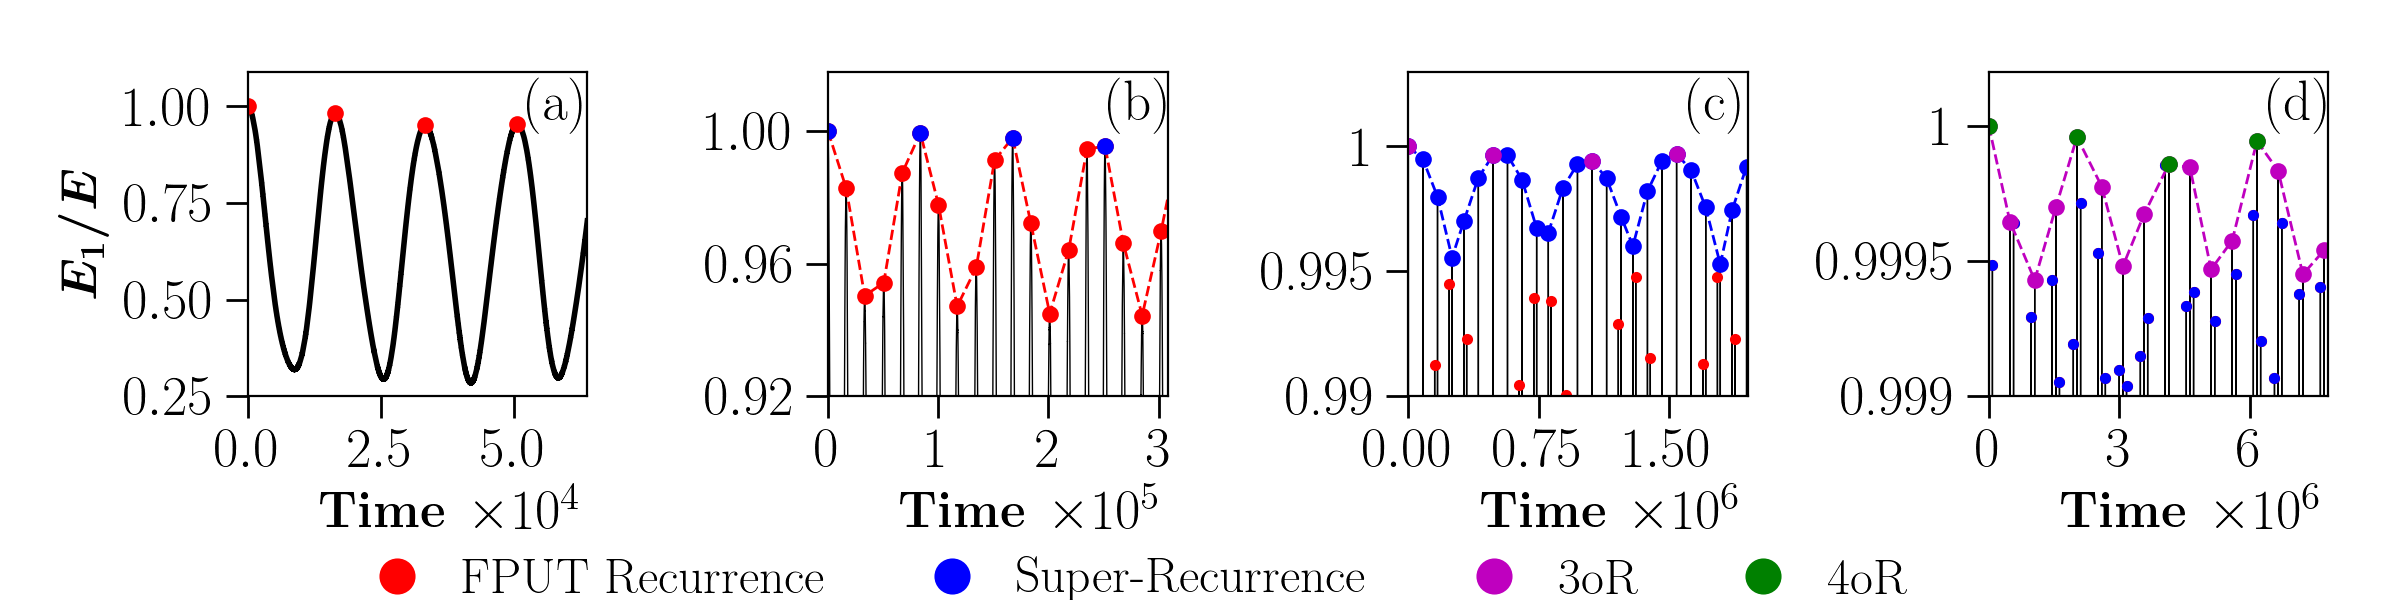

T_1oR: 16768.52198864843
T_2oR: 81106.47947726658
T_3oR: 514230.33264316624
T_4oR: 2056923.3317981476


/home/sal/Programs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [9]:
#Alpha_HoR_Existence


fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(1,1,1)

ax1 = fig.add_subplot(1,4,1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax2 = fig.add_subplot(1,4,2)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax3 = fig.add_subplot(1,4,3)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax4 = fig.add_subplot(1,4,4)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


ax1.set_ylabel(r'$\boldsymbol{E_{1}/E}$')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax1.set_xlabel(r'$\textbf{Time}$')
ax2.set_xlabel(r'$\textbf{Time}$')
ax3.set_xlabel(r'$\textbf{Time}$')
ax4.set_xlabel(r'$\textbf{Time}$')

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.yaxis.set_label_coords(-.15,0.5)
ax1.xaxis.set_label_coords(0.4,-.3)
ax2.xaxis.set_label_coords(0.4,-.3)
ax3.xaxis.set_label_coords(0.4,-.3)
ax4.xaxis.set_label_coords(0.4,-.3)

ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])

ax.plot([],[],'o', color='r',label='FPUT Recurrence')
ax.plot([],[],'o', color='b',label='Super-Recurrence')
ax.plot([],[],'o', color='m',label='3oR')
ax.plot([],[],'o', color='g',label='4oR')


ax1.plot(t,energy_prop[:,0],color='k')
ax1.plot(r_time[:],r_envelope[:],'o', color='r')

ax2.plot(t,energy_prop[:,0],color='k',linewidth=.5)
ax2.plot(r_time[:],r_envelope[:],'--o', color='r',linewidth=1)
ax2.plot(sr_time[:],sr_envelope[:],'o', color='b')

ax3.plot(t,energy_prop[:,0],color='k',linewidth=.5)
ax3.plot(r_time[:],r_envelope[:],'o', color='r',markersize=3)
ax3.plot(sr_time[:],sr_envelope[:],'--o', color='b',linewidth=1)
ax3.plot(ssr_time[:],ssr_envelope[:],'o', color='m')

ax4.plot(t,energy_prop[:,0],color='k',linewidth=.5)
ax4.plot(r_time[:],r_envelope[:],'o', color='r',markersize=3)
ax4.plot(sr_time[:],sr_envelope[:],'o', color='b',markersize=3)
ax4.plot(ssr_time[:],ssr_envelope[:],'--o', color='m',linewidth=1)
ax4.plot(sssr_time[:],sssr_envelope[:],'o', color='g')

ax1.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax2.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax3.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
ax4.tick_params(which='both',direction='out', length=8, width=1,top=False, right=False)
#ax5.tick_params(which='both',direction='in', length=8, width=1,top=True, right=True)

ax1.annotate("(a)", xy=(0.82, 0.85), xycoords="axes fraction")
ax2.annotate("(b)", xy=(0.82, 0.85), xycoords="axes fraction")
ax3.annotate("(c)", xy=(0.82, 0.85), xycoords="axes fraction")
ax4.annotate("(d)", xy=(0.82, 0.85), xycoords="axes fraction")

ax1.set_xlim(left=0,right=3.8*t_r)
ax2.set_xlim(left=0,right=3.8*t_sr)
ax3.set_xlim(left=0,right=3.8*t_ssr)
ax4.set_xlim(left=0,right=3.8*t_sssr)

ax1.set_ylim(bottom=.25,top=1.09)
ax2.set_ylim(bottom=.94,top=1.018)
ax3.set_ylim(bottom=.99,top= 1.003)
ax4.set_ylim(bottom=.999,top=1.0002)


ax1.axes.yaxis.set_ticks([.25,.50,.75,1])
ax2.axes.yaxis.set_ticks([.92,.96,1])

ax3.axes.yaxis.set_ticks([.99,.995,1])
ax3.axes.yaxis.set_ticklabels([.99,.995,1])

ax4.axes.yaxis.set_ticks([.999,.9995,1])
ax4.axes.yaxis.set_ticklabels([.999,.9995,1])



ax1.axes.xaxis.set_ticks([0,25000,50000])

ax2.axes.xaxis.set_ticks([0,100000,200000,300000])

ax3.axes.xaxis.set_ticks([0,750000,1500000])

ax4.axes.xaxis.set_ticks([0,3000000,6000000])



print('T_1oR: ' + str(t_r))
print('T_2oR: ' + str(t_sr))
print('T_3oR: ' + str(t_ssr))
print('T_4oR: ' + str(t_sssr))


leg=ax.legend(loc=(0.05,-0.7),handlelength=1,framealpha=1,prop={'size':18},ncol=5,frameon=False)
for legobj in leg.legendHandles:
    legobj._legmarker.set_markersize(12.0)
plt.tight_layout()

fig.savefig('HoR.png', bbox_inches='tight', dpi=500)


In [24]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
for i in range(4):
    ax.plot(t,energy_nm_[:,i],label='Mode: '+str(i+1),linewidth = .7)
for i in range(4,15):
    ax.plot(t,energy_nm_[:,i],linewidth = .7)
ax.set_xlabel(r'$\textbf{Time}$')
ax.set_xlim(left=0,right=250000)
ax.set_ylim(bottom=0,top=.08)
if parameters[1] == 3:
    ax.set_ylabel(r'$\textbf{Energy}$')
    print('N= '+str(parameters[0]))
    print('E*alpha^2= '+str(sum(energy_nm_[0,:])))
    #print('dt=' + str(parameters[4]))
if parameters[1] == 4:
    ax.set_ylabel(r'$\textbf{Energy}}$')
    print('N= '+str(parameters[0]))
    print('E*beta= '+str(sum(energy_nm_[0,:])))
    #print('dt=' + str(parameters[4]))
energy_nm_[0]
ax.legend(loc=(0,-0.3),handlelength=1,framealpha=1,prop={'size':17},ncol=5,frameon=False)
#ax.legend(handlelength=1,framealpha=1,prop={'size':12},frameon=True)

fig.savefig('2oR.jpg', bbox_inches='tight', dpi=700)




N= 31.0
E*alpha^2= 0.07704437324484982
